In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
df=pd.read_csv('annual-balance-sheets-2007-2021-provisional.csv')
df.head()

,Period,Inst_sector,Inst_sector_code,Descriptor,SNA08TRANS,Asset_liability_code,Values
0,2007.03,Non-corporate business enterprises,121,Closing balance total assets,LE00000,A000000,345973
1,2007.03,Non-corporate business enterprises,121,Financial assets Closing balance total financi...,LE00000,AFA0000,99770
2,2007.03,Non-corporate business enterprises,121,Financial assets Closing balance monetary gold...,LE00000,AFA0100,0
3,2007.03,Non-corporate business enterprises,121,Financial assets Closing balance currency and ...,LE00000,AFA0200,14773
4,2007.03,Non-corporate business enterprises,121,Financial assets Closing balance debt securities,LE00000,AFA0300,1267


In [3]:
df=df.drop(['SNA08TRANS','Period','Asset_liability_code'], axis='columns')   #to drop some columns
df.head()

,Inst_sector,Inst_sector_code,Descriptor,Values
0,Non-corporate business enterprises,121,Closing balance total assets,345973
1,Non-corporate business enterprises,121,Financial assets Closing balance total financi...,99770
2,Non-corporate business enterprises,121,Financial assets Closing balance monetary gold...,0
3,Non-corporate business enterprises,121,Financial assets Closing balance currency and ...,14773
4,Non-corporate business enterprises,121,Financial assets Closing balance debt securities,1267


In [4]:
# for count of Inst_sector columns
df.groupby('Inst_sector')['Inst_sector'].agg('count')

Inst_sector
Captive financial institutions                                               345
Central bank                                                                 345
Central government institutions excluding funded social insurance schemes    345
Central government institutions funded social insurance schemes              345
Corporate business enterprises                                               345
Financial auxiliaries                                                        345
Households                                                                   345
Insurance corporations                                                       345
Investment funds                                                             345
Local government institutions                                                345
Non-corporate business enterprises                                           345
Non-profit institutions serving households                                   345
Other depository

In [5]:
df.shape

(6555, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Inst_sector       6555 non-null   object
 1   Inst_sector_code  6555 non-null   int64 
 2   Descriptor        6555 non-null   object
 3   Values            6555 non-null   object
dtypes: int64(1), object(3)
memory usage: 205.0+ KB


In [7]:
df.isnull().sum()
# this is perfect data with null data that need to be cleaned


Inst_sector         0
Inst_sector_code    0
Descriptor          0
Values              0
dtype: int64

In [8]:
# to check for empty string
df=df.replace('',np.nan)

df=df.isnull().sum()
df

Inst_sector         0
Inst_sector_code    0
Descriptor          0
Values              0
dtype: int64

In [9]:
# to convert to int of float, use any of the following option below
# df['Values']=df['Values'].astype(str).astype(int)
# # df.Values=df.astype({'Values':'float'})

df['Values']=pd.to_numeric(df.Values,errors='coerce')  #to force a column to be float, when there is things making it to change from str
df.Values

# to replace null values with zero
# df=df.replace(np.nan,0,regex=True) or

# to replace empty string('') with null value convert it float or int astype(int)
# df['Values']=df['Values'].replace('',np.nan).astype(float)

0

In [10]:
# from numpy import replace
# df['Values']=df['Values'].replace(np.nan,0)  #you can remove the null value by using "df.dropna()"
df.Values.astype(int) 
df.Values.dtype

dtype('int64')

In [11]:
# df['Inst_sector'].unique()
ab=df.Values.unique()
# print(type(ab))

AttributeError: 'numpy.int64' object has no attribute 'unique'

In [ ]:
c=df.corr()  
sns.heatmap(c,cmap="BrBG",annot=True)
c 

TypeError: Series.corr() missing 1 required positional argument: 'other'

In [ ]:
# sector=df['Inst_sector'].value_counts()
value_description=df.groupby(by='Descriptor').max()[["Values","Inst_sector_code"]].sort_values(by=['Values'],ascending=False).reset_index()
value_description.head()

ValueError: Grouper for 'Descriptor' not 1-dimensional

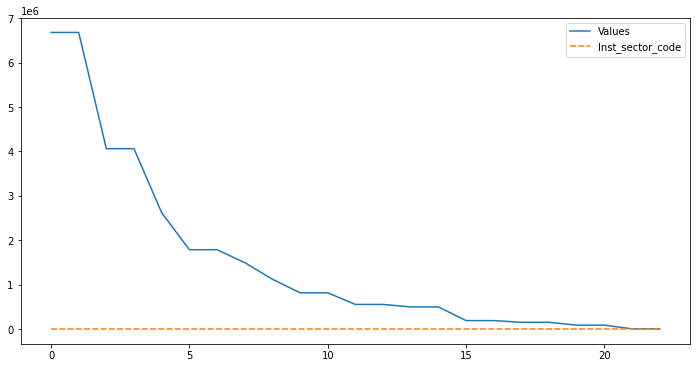

In [ ]:
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data=value_description)

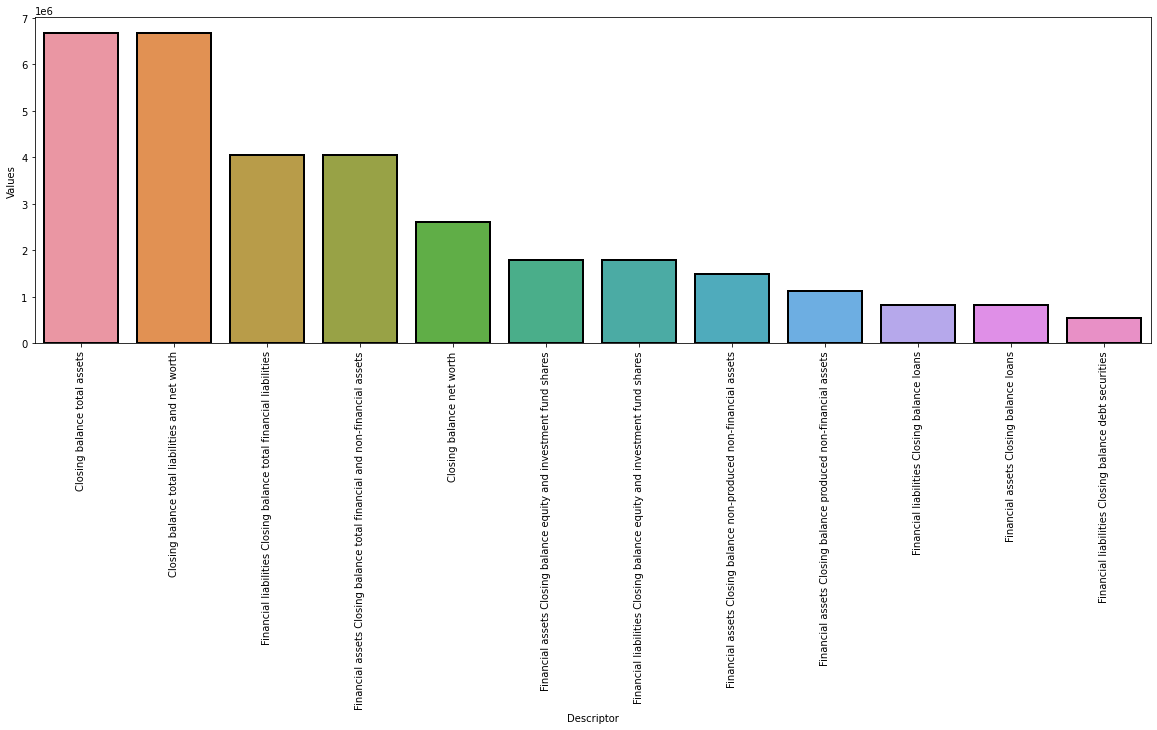

In [ ]:
value_description=df.groupby(by='Descriptor').max()[["Values","Inst_sector_code"]].sort_values(by=['Values'],ascending=False).reset_index()
fig=plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
ax=sns.barplot(data=value_description.iloc[:12], y="Values",x="Descriptor",linewidth=2,edgecolor="black" )


In [ ]:
closing_bal=df.groupby(df['Descriptor']=='Closing balance total assets')['Values'].sum()
closing_bal

Descriptor
False    837956154.0
True     197936222.0
Name: Values, dtype: float64

<AxesSubplot:xlabel='Descriptor'>

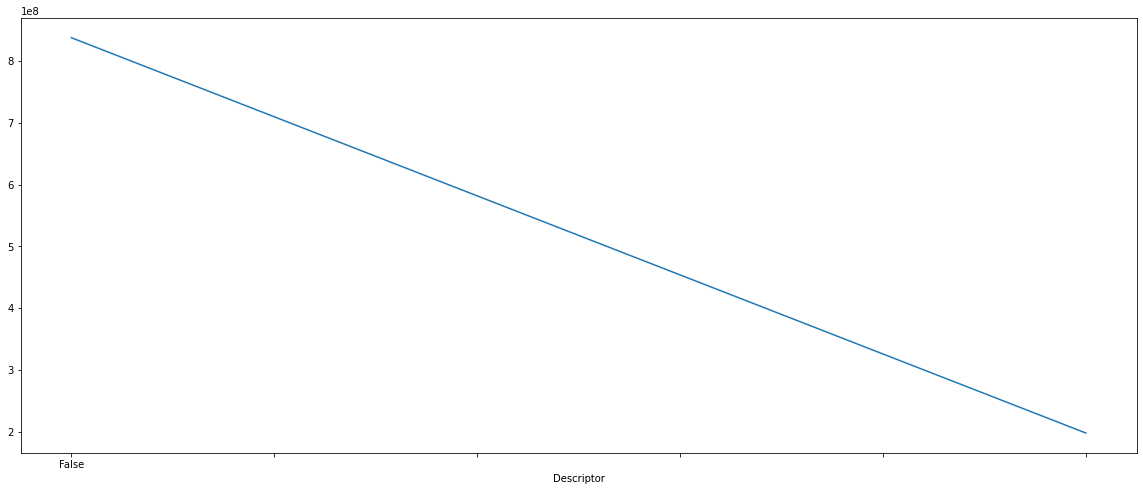

In [ ]:
closing_bal.plot(kind='line',figsize=(20,8))